# Butterfly_Classification


1.The Core Objective
The goal of this project is to automate the identification of 75 different butterfly species from digital images. In the biological world, many butterflies look nearly identical (like the Monarch and the Viceroy). Your project uses Deep Learning to "see" the tiny textures, wing patterns, and color gradients that a human might miss.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [20]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
butterfly-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/butterfly-image-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten



In [23]:
import cv2

img = cv2.imread('/content/train/Image_1.jpg')
shape = img.shape
shape

(224, 224, 3)

In [24]:
import pandas as pd
import os
import shutil

# 1. Read the CSV that maps filenames to labels
df = pd.read_csv('/content/Training_set.csv')

# 2. Define the path where the unzipped images are
source_dir = '/content/train'
base_dir = '/content/organized_train/'

# 3. Create folders for each class and move images
for index, row in df.iterrows():
    label = row['label']
    filename = row['filename']

    # Path to the new class folder
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Move the file
    src_path = os.path.join(source_dir, filename)
    dst_path = os.path.join(label_dir, filename)

    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)

print("Images organized successfully!")

Images organized successfully!


In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/organized_train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (224,224),
    shuffle = True,
    seed = 42,
    validation_split = 0.2,
    subset = 'training'
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/organized_train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (224,224),
    shuffle = False,
    seed = 42,
    validation_split = 0.2,
    subset = 'validation'
)



Found 6499 files belonging to 75 classes.
Using 5200 files for training.
Found 6499 files belonging to 75 classes.
Using 1299 files for validation.


In [28]:
# Normalize

def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [35]:
# Create CNN Model


model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(75,activation = 'softmax'))




In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,287,243 (85.02 MB)

 Trainable params: 22,287,243 (85.02 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [41]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9369 - loss: 0.2185 - val_accuracy: 0.8814 - val_loss: 0.5824
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9626 - loss: 0.1370 - val_accuracy: 0.8607 - val_loss: 0.7337
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9780 - loss: 0.0814 - val_accuracy: 0.8437 - val_loss: 0.9400
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9819 - loss: 0.0681 - val_accuracy: 0.8753 - val_loss: 0.7687
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9869 - loss: 0.0630 - val_accuracy: 0.8737 - val_loss: 0.8155
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9933 - loss: 0.0244 - val_accuracy: 0.8876 - val_loss: 0.7664
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9817 - loss: 0.0623 - val_accuracy: 0.8776 - val_loss: 0.9097
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9703 - loss: 0.1042 - va

In [42]:
loss,accuracy = model.evaluate(test_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8565 - loss: 0.9491


In [43]:
print(accuracy)


0.8714395761489868

In [54]:
class_names = sorted(df['label'].unique())


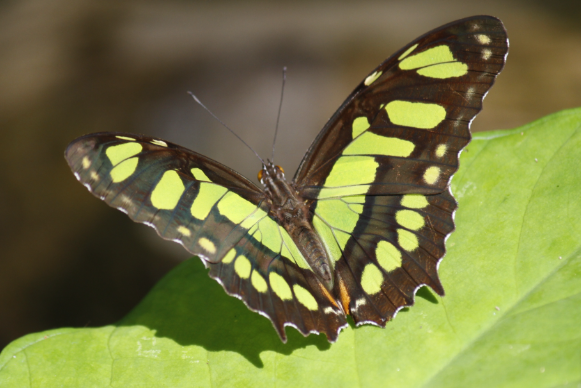

Malachite


In [65]:
from google.colab.patches import cv2_imshow

img = '/content/Screenshot 2026-01-21 175529.png'

img_array  = cv2.imread(img)

cv2_imshow(img_array)
print('Malachite')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


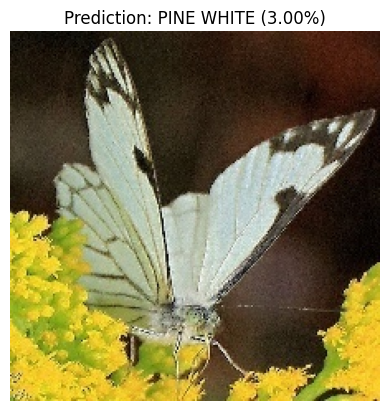

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_butterfly(img_path, model, class_names):

    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)


    img_array = np.expand_dims(img_array, axis=0)


    img_array = img_array / 255.0

    predictions = model.predict(img_array)

    score = tf.nn.softmax(predictions[0]) # Use softmax to get confidence levels
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()



predict_butterfly('/content/test/Image_1.jpg', model, class_names)

In [71]:
model.save('butterfly_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


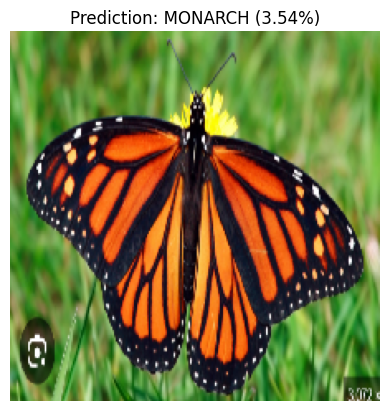

In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_butterfly(img_path, model, class_names):

    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)


    img_array = np.expand_dims(img_array, axis=0)


    img_array = img_array / 255.0

    predictions = model.predict(img_array)

    score = tf.nn.softmax(predictions[0]) # Use softmax to get confidence levels
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()



predict_butterfly('/content/Screenshot 2026-01-21 183738.png', model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


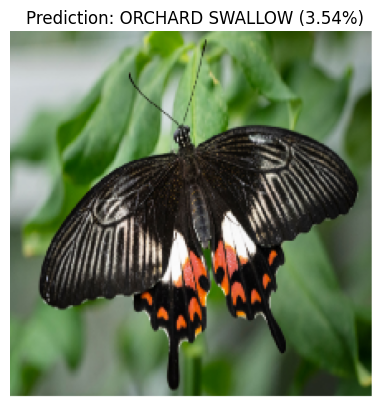

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_butterfly(img_path, model, class_names):

    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)


    img_array = np.expand_dims(img_array, axis=0)


    img_array = img_array / 255.0

    predictions = model.predict(img_array)

    score = tf.nn.softmax(predictions[0]) # Use softmax to get confidence levels
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()



predict_butterfly('/content/Screenshot 2026-01-21 183951.png', model, class_names)

In [ ]:
# All of these predictions are mostly true